In [2]:
from pcap_to_image_test import *
import json
import random

%matplotlib inline

data_path = pathlib.Path.cwd() / 'data' / '44_80' / 'One_Pi'
image_path = pathlib.Path.cwd() / 'images'
files = list(data_path.glob("*.pcap"))
lengths = {}

with open('lengths.json') as f:
    lengths = json.load(f)

The following code turns every .pcap file in `data_path` into an image file.
It then moves 10% of those images to `image_path / 'test'` and the rest to `image_path / 'train'`. On top of that, it records the duration (times 500) of each file in `lengths.json`

In [3]:
for file in files:
    action, number = file.name.split('.')[0].split('-')
    image_name = (action + '-' + number + '.png')

    # 10% of images will go into testing, while the rest will go to training
    dest_path = image_path / ('test' if random.random() < 0.1 else 'train')
    (dest_path / action).mkdir(parents=True, exist_ok=True)
    try:
        # stores the length of each pcap file in lengths.json
        # moves the newly created image to destination path even if it already exists there
        lengths[image_name] = pcap_to_image(file)
        print('turned', file.name, 'into an image')
        (data_path / image_name).replace(dest_path / action /image_name)
    except:
        print(file.name, 'is unreadable')
        pass

with open('lengths.json', 'w') as f:
    json.dump(lengths, f)


turned Box_Ana-0.pcap into an image
turned Box_Ana-1.pcap into an image
turned Box_Ana-10.pcap into an image
turned Box_Ana-11.pcap into an image
turned Box_Ana-12.pcap into an image
turned Box_Ana-13.pcap into an image
turned Box_Ana-14.pcap into an image
turned Box_Ana-15.pcap into an image
turned Box_Ana-16.pcap into an image
turned Box_Ana-17.pcap into an image
turned Box_Ana-18.pcap into an image
turned Box_Ana-19.pcap into an image
turned Box_Ana-2.pcap into an image
turned Box_Ana-20.pcap into an image
turned Box_Ana-21.pcap into an image
turned Box_Ana-22.pcap into an image
turned Box_Ana-23.pcap into an image
turned Box_Ana-24.pcap into an image
turned Box_Ana-25.pcap into an image
turned Box_Ana-26.pcap into an image
turned Box_Ana-27.pcap into an image
turned Box_Ana-28.pcap into an image
turned Box_Ana-29.pcap into an image
turned Box_Ana-3.pcap into an image
turned Box_Ana-30.pcap into an image
turned Box_Ana-31.pcap into an image
turned Box_Ana-32.pcap into an image
turne

This shows the distribution of file durations on a histogram, to later make a decision of the cutoff height to use for the final images.

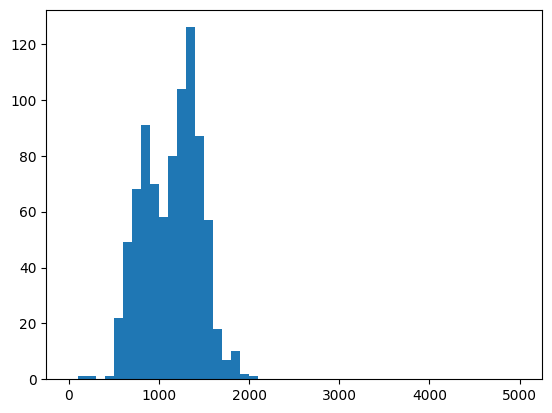

In [5]:
%matplotlib inline
plt.hist(list(lengths.values()), range=(0,5000), bins=50)
plt.show()

Set `min_len` to your desired cutoff height, and the following code will crop every previously generated image to that height.

In [6]:

min_len = 800
print(min_len) 
for image in list(image_path.glob("**/**/*.png")):
    crop_image(image, crop_length=min_len)


800


This code turns two `.pcap` files to a single image.

In [ ]:
actions = {}
for file in files:
    action = file.name.rsplit('_',1)[0]
    number = int(file.name.rsplit('.')[0].rsplit('-')[1])
    print(action, number)

    if action not in actions.keys():
        actions[action] = 0
    elif number > actions[action]:
        actions[action] = number


for action in actions.keys():
    for i in range(actions[action]+1):
        file1 = data_path / f'{action}_1-{i}.pcap'
        file2 = data_path / f'{action}_2-{i}.pcap'
        pcaps_to_image([file1, file2])